# 과적합과 일반화

- **Generalization (일반화)**
    - 모델이 새로운 데이터셋(테스트 데이터)에 대하여 정확히 예측하면 이것을 (훈련데이터에서 테스트데이터로) 일반화 되었다고 말한다. 
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다.
- **Overfitting (과대적합)**
    - 모델이 훈련 데이터에 대한 예측성능은 **너무** 좋지만 일반성이 떨어져 새로운 데이터(테스트 데이터)에 대해선 성능이 좋지 않은 것을 Overfitting이라고 한다. 
    - 이는 모델이 훈련 데이터 세트의 특징을 너무 맞춰서 학습 되었기 때문에 일반화 되지 않아 새로운 데이터셋(테스트세트)에 대한 예측 성능이 떨져 발생한다.        
- **Underfitting (과소적합)**
    - 모델이 훈련 데이터과 테스트 데이터셋 모두에서 성능이 안좋은 것을 말한다.
    - 모델이 너무 간단하여 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾아내지 못해서 발생한다.

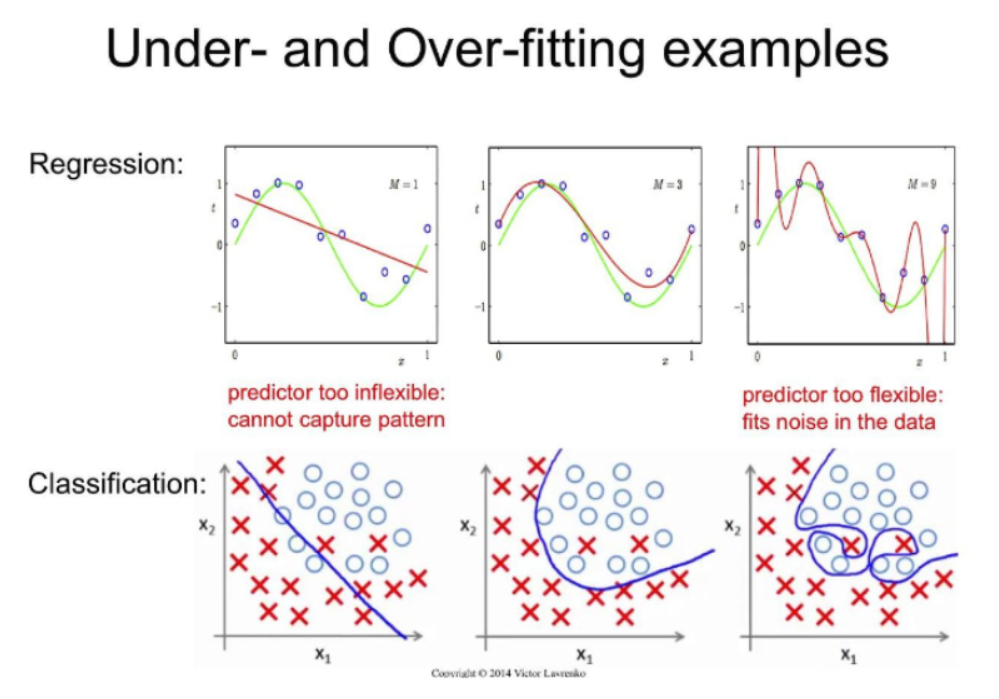

## Overfitting(과대적합)의 원인
- 학습 데이터 양에 비해 모델이 너무 복잡한 경우 발생.
    - 데이터의 양을 늘린다. 
        - 시간과 돈이 들기 때문에 현실적으로 어렵다.
    - 모델을 좀더 단순하게 만든다.
        - 사용한 모델보다 좀더 단순한 모델을 사용한다.
        - 모든 모델은 모델의 복잡도를 변경할 수 있는 **규제와 관련된 하이퍼파라미터**를 제공하는데 이것을 조절한다.

## Underfitting(과소적합)의 원인
- 데이터 양에 비해서 모델이 너무 단순한 경우 발생
    - 좀더 복잡한 모델을 사용한다.
    - 모델이 제공하는 규제 하이퍼파라미터를 조절한다.

## 규제 하이퍼파라미터란?
- 모델의 복잡도를 규제하는 하이퍼파라미터로 Overfitting이나 Underfitting이 난 경우 이 값을 조정하여 모델이 일반화 되도록 도와준다.
- 이 규제 하이퍼파라미터들은 모든 머신러닝 모델마다 있다.

> ### 하이퍼파라미터란
>- **하이퍼파라미터 (Hyper Parameter)**
>    - 모델의 성능에 영향을 끼치는 파라미터 값으로 모델 생성시 사람이 직접 지정해 주는 값(파라미터)
>- **하이퍼파라미터 튜닝(Hyper Parameter Tunning)**
>    - 모델의 성능을 가장 높일 수 있는 하이퍼 파라미터를 찾는 작업
>- **파라미터(Parameter)**
>    - 머신러닝에서 파라미터는 모델이 데이터 학습을 통해 직접 찾아야 하는 값을 말한다.

# Grid Search 를 이용한 [하이퍼파라미터](#하이퍼파라미터란) 튜닝
- 모델의 성능을 가장 높게 하는 최적의 하이퍼파라미터를 찾는 방법.
- 하이퍼파라미터 후보들을 하나씩 입력해 모델의 성능이 가장 좋게 만드는 값을 찾는다.

## 종류
1. **Grid Search 방식**
    - sklearn.model_selection.**GridSearchCV**
        - 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾아준다.
        - 적은 수의 조합의 경우는 괜찮지만 시도할 하이퍼파라미터와 값들이 많아지면 너무 많은 시간이 걸린다.

2. **Random Search 방식**
    - sklearn.model_selection.**RandomizedSearchCV**
        - GridSeach와 동일한 방식으로 사용한다.
        - 모든 조합을 다 시도하지 않고 임의로 몇개의 조합만 테스트 한다.

### [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 매개변수및 결과조회
- **Initializer 매개변수**
    - **estimator:** 모델객체 지정
    - **params :** 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **scoring:** 평가 지표
        - 평가지표문자열: https://scikit-learn.org/stable/modules/model_evaluation.html
        - 생략시 분류는 **accuracy**, 회귀는 **$R^2$** 를 기본 평가지표로 설정한다.
        - 여러개일 경우 List로 묶어서 지정
    - **refit:** best parameter를 정할 때 사용할 평가지표
        - scoring에 여러개의 평가지표를 설정한 경우 refit을 반드시 설정해야 한다.
    - **cv:** 교차검증시 fold 개수. 
    - **n_jobs:** 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y):** 학습
    - **predict(X):** 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X):** 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit() 후에 호출 할 수 있다.
    - **cv_results_:** 파라미터 조합별 평가 결과를 Dictionary로 반환한다.
    - **best_params_:** 가장 좋은 성능을 낸 parameter 조합을 반환한다.
    - **best_estimator_:** 가장 좋은 성능을 낸 모델을 반환한다.
    - **best_score_:** 가장 좋은 점수 반환한다.

##### GridSearchCV 생성

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[None,1,2,3,4,5],
             'max_leaf_nodes':[3,5,7,9]}
grid_search = GridSearchCV(tree,
                          param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs=-1)

#### 학습

In [6]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

#### 결과확인

In [7]:
grid_search.cv_results_  # 모든 결과

{'mean_fit_time': array([0.00658255, 0.00558462, 0.00678158, 0.00877666, 0.00259209,
        0.00299244, 0.0027926 , 0.00299339, 0.00379081, 0.00398917,
        0.00359039, 0.00359101, 0.0045876 , 0.00538425, 0.00478745,
        0.0055851 , 0.00398927, 0.00438852, 0.00498605, 0.00578418,
        0.00438809, 0.00518556, 0.00478749, 0.00518417]),
 'std_fit_time': array([1.19731485e-03, 4.87769094e-04, 7.46799578e-04, 5.10149458e-03,
        4.88328256e-04, 6.30374222e-04, 3.98995355e-04, 4.48176198e-06,
        3.98733171e-04, 1.27414601e-06, 4.88462321e-04, 4.88287942e-04,
        4.89260099e-04, 4.87422127e-04, 3.99831412e-04, 7.97522550e-04,
        4.62310777e-07, 4.88267219e-04, 1.05552405e-06, 3.98588337e-04,
        4.89200787e-04, 9.77875636e-04, 7.49618670e-04, 7.44636500e-04]),
 'mean_score_time': array([0.00079737, 0.00079765, 0.00059819, 0.00119615, 0.00079789,
        0.000598  , 0.00039868, 0.00019927, 0.00079775, 0.00079842,
        0.00059843, 0.00099807, 0.00039897, 0.00

In [10]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)
df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.006782,0.000747,0.000598,0.000488,None,7,"{'max_depth': None, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.941176,0.964706,0.943666,0.028225,1
18,0.004986,0.000001,0.000399,0.000489,4,7,"{'max_depth': 4, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.941176,0.964706,0.943666,0.028225,1
22,0.004787,0.000750,0.000598,0.000488,5,7,"{'max_depth': 5, 'max_leaf_nodes': 7}",0.94186,0.976471,0.894118,0.941176,0.964706,0.943666,0.028225,1
23,0.005184,0.000745,0.000201,0.000402,5,9,"{'max_depth': 5, 'max_leaf_nodes': 9}",0.94186,0.976471,0.882353,0.929412,0.952941,0.936607,0.031237,4
1,0.005585,0.000488,0.000798,0.000399,None,5,"{'max_depth': None, 'max_leaf_nodes': 5}",0.94186,0.964706,0.905882,0.929412,0.941176,0.936607,0.019151,4


In [11]:
print("가장 좋은 평가점수: ",grid_search.best_score_)

가장 좋은 평가점수:  0.9436662106703146


In [12]:
print("가장 좋은 파라미터 조합:",grid_search.best_params_)

가장 좋은 파라미터 조합: {'max_depth': None, 'max_leaf_nodes': 7}


##### best model을 이용해 Test set 최종평가

In [16]:
best_model = grid_search.best_estimator_

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, best_model.predict(X_test))

0.9370629370629371

In [18]:
accuracy_score(y_test, grid_search.predict(X_test))  #grid_seach객체.predict() 추론 => best_estimator_를 이용해서 추론

0.9370629370629371

##### 여러 성능지표를 확인
- 여러 성능지표는 확인할 수 있지만 최적의 파라미터를 찾기 위해서는 하나의 지표만 사용한다. 
    - scoring에 리스트로 평가지표들 묶어서 설정
    - refit에 최적의 파라미터 찾기 위한 평가지표 설정

In [19]:
tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[None, 1, 2, 3, 4, 5],
              'max_leaf_nodes':[3,5,7,9]
             }
grid_search = GridSearchCV(tree, 
                           param_grid=param_grid,
                           scoring=['accuracy', 'recall', 'precision','roc_auc', 'f1'], 
                           refit='roc_auc', # 순위 기준이될 평가지표 설정
                           cv=5, 
                           n_jobs=-1)

### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- **Initializer 매개변수**
    - **estimator:** 모델객체 지정
    - **param_distributions:** 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **<font color='red'>n_iter</font>:** 전체 조합중 몇개의 조합을 테스트 할지 개수 설정
    - **scoring:** 평가 지표
    - **refit:** best parameter를 정할 때 사용할 평가지표. Scoring에 여러개의 평가지표를 설정한 경우 설정.
    - **cv:** 교차검증시 fold 개수. 
    - **n_jobs:** 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y):** 학습
    - **predict(X):** 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X):** 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit() 후에 호출 할 수 있다.
    - **cv_results_:** 파라미터 조합별 평가 결과를 Dictionary로 반환한다.
    - **best_params_:** 가장 좋은 성능을 낸 parameter 조합을 반환한다.
    - **best_estimator_:** 가장 좋은 성능을 낸 모델을 반환한다.
    - **best_score_:** 가장 좋은 점수 반환한다.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

##### RandomizedSearchCV 생성

In [21]:
tree = DecisionTreeClassifier(random_state=0)
param_grid = {
    "max_depth":range(1,11), # 10
    "max_leaf_nodes":range(3,31,3), # 10
    "criterion":["gini", "entropy"] # 노드의 불순도를 계산하는 방식 지정. 
}

n_iter_search = 60 

# scoring 생략 - 분류: accuracy, 회귀: r**2 (결정계수, r square)  => 기본 평가지표
random_search = RandomizedSearchCV(tree,   #모델
                                   param_distributions=param_grid, # 파라미터조합
                                   n_iter=n_iter_search, # 50 200개 조합중 랜덤하게 50개만 선택해서 확인
#                                    scoring='accuracy',
                                   cv=4, # cross validation의 fold 개수
                                   n_jobs=-1)  #cpu 프로세스 몇개에서 병렬로 학습할지 개수 지정. 


##### 학습

In [22]:
random_search.fit(X_train, y_train)  # 최적의 파라미터 찾는 작업 

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 11),
                                        'max_leaf_nodes': range(3, 31, 3)})

##### 결과확인

In [23]:
# 전체 결과 확인
result_dict = random_search.cv_results_
result_dict

{'mean_fit_time': array([0.00174737, 0.00199479, 0.0017451 , 0.00174588, 0.00149542,
        0.00149632, 0.00249356, 0.00099891, 0.00149518, 0.00124711,
        0.00124866, 0.00124675, 0.00149614, 0.00099754, 0.00099713,
        0.00124508, 0.00124931, 0.00124663, 0.00149584, 0.00074768,
        0.00074267, 0.00074691, 0.00124574, 0.00099701, 0.00099719,
        0.00099736, 0.00074774, 0.00099713, 0.00099772, 0.00074852,
        0.00074798, 0.00099725, 0.00099748, 0.00099725, 0.00099576,
        0.0009957 , 0.00074822, 0.00099754, 0.00099766, 0.00099754,
        0.00124693, 0.00124633, 0.00174558, 0.00099766, 0.00124633,
        0.00124717, 0.00149608, 0.00099725, 0.00099707, 0.00124705,
        0.00099677, 0.00099725, 0.00099707, 0.00099736, 0.00124693,
        0.00099725, 0.0009973 , 0.00049859, 0.0009973 , 0.00074548]),
 'std_fit_time': array([4.31267577e-04, 8.32333567e-07, 4.31635504e-04, 4.33291918e-04,
        5.03138009e-04, 4.98652814e-04, 8.63657051e-04, 3.48113579e-06,
     

In [24]:
result_df = pd.DataFrame(result_dict)
print(result_df.shape)
result_df.head()

(60, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001747,4.312676e-04,0.000498,0.000498,12,2,entropy,"{'max_leaf_nodes': 12, 'max_depth': 2, 'criter...",0.928571,0.928571,0.928571,0.928571,0.928571,0.000000,1
1,0.001995,8.323336e-07,0.000499,0.000499,30,6,entropy,"{'max_leaf_nodes': 30, 'max_depth': 6, 'criter...",0.928571,0.892857,0.928571,0.928571,0.919643,0.015465,9
2,0.001745,4.316355e-04,0.000499,0.000499,18,6,entropy,"{'max_leaf_nodes': 18, 'max_depth': 6, 'criter...",0.928571,0.892857,0.928571,0.928571,0.919643,0.015465,9
3,0.001746,4.332919e-04,0.000249,0.000432,15,8,gini,"{'max_leaf_nodes': 15, 'max_depth': 8, 'criter...",0.928571,0.892857,0.928571,0.928571,0.919643,0.015465,9
4,0.001495,5.031380e-04,0.000499,0.000499,3,6,entropy,"{'max_leaf_nodes': 3, 'max_depth': 6, 'criteri...",0.928571,0.928571,0.928571,0.928571,0.928571,0.000000,1


In [25]:
random_search.best_score_

0.9285714285714286

In [26]:
random_search.best_params_

{'max_leaf_nodes': 12, 'max_depth': 2, 'criterion': 'entropy'}

##### best model을 이용해 Test set 최종평가

In [27]:
best_model = random_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=12,
                       random_state=0)

In [28]:
accuracy_score(y_test, best_model.predict(X_test))

0.9736842105263158

In [29]:
accuracy_score(y_test, random_search.predict(X_test))

0.9736842105263158

# 파이프라인 (Pipeline)
- 개요
    - 여러 단계의 머신러닝 프로세스 (전처리의 각 단계, 모델생성, 학습) 처리 과정을 설정하여 한번에 처리되도록 한다.
- 파이프라인은 여러개의 변환기와 마지막에 변환기 또는 추정기를 넣을 수 있다. (추정기-Estimator는 마지막에만 올 수 있다.)
- 전처리 작업 파이프라인
    - 변환기들로만 구성
- 전체 프로세스 파이프 라인
    - 마지막에 추정기를 넣는다

## Pipeline 생성
- (이름, 변환기) 를 리스트로 묶어서 전달한다.
- 마지막에는 추정기가 올 수있다.

## Pipeline 을 이용한 학습
- pipeline.fit() 
    - 각 순서대로 각 변환기의 fit_transform()이 실행되고 결과가 다음 단계로 전달된다. 마지막 단계에서는 fit()만 호출한다.
    - 마지막이 추정기일때 사용
- pipeline.fit_transform()
    - fit()과 동일하나 마지막 단계에서도 fit_transform()이 실행된다.
    - 전처리 작업 파이프라인(모든 단계가 변환기)일 때  사용
- 마지막이 추정기(모델) 일 경우
    - predict(X), predict_proba(X)
    - 추정기를 이용해서 X에 대한 결과를 추론
    - 모델 앞에 있는 변환기들을 이용해서 transform() 그 처리결과를 다음 단계로 전달

In [30]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

X, y = load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, random_state=0)

##### Pipeline 생성

In [34]:
order = {('scaler',StandardScaler()),
        ('svm',SVC())}

pipeline=Pipeline(order, verbose=True)
print(pipline.steps)

{('scaler', StandardScaler()), ('svm', SVC())}


##### 학습

In [35]:
# 변환기(scaler).fit_transform(X_train) -> svm.fit(변환된 X_train, y_train )
pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())], verbose=True)

##### 추론 및 평가

In [36]:
# 변환기(scaler).transform(X_train) --> svm(추정기).predict(변환된_X_train)
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [37]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9929577464788732, 0.958041958041958)

## GridSearch에서 Pipeline 사용
- 하이퍼파라미터 지정시 파이프라인 `프로세스이름__하이퍼파라미터` 형식으로 지정한다.
1. Pipeline 생성
2. GridSearchCV의 estimator에 pipeline 등록

##### Pipeline 생성

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

order = [
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=0))
]
pipeline = Pipeline(order)

##### GridSearchCV 생성
- model에 Pipeline을 설정한다.

In [39]:
param = {
    "svc__C":[0.001, 0.01, 0.1, 1, 10],      #Pipeline안의 프로세스중 이름이 svc인 모델의 C 하이퍼파라미터의 후보
    "svc__gamma":[0.001, 0.01, 0.1, 1, 10]   #Pipeline안의 프로세스중 이름이 svc인 모델의 gamma 하이퍼파라미터의 후보
}
gs = GridSearchCV(pipeline, 
                  param, 
                  scoring='accuracy', 
                  cv=4, 
                  n_jobs=-1)

##### 학습

In [40]:
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=0))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

##### 결과확인

In [41]:
print(gs.best_params_)
print(gs.best_score_)

{'svc__C': 10, 'svc__gamma': 0.01}
0.9812643272791395


In [43]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df[df.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
21,"{'svc__C': 10, 'svc__gamma': 0.01}",0.971963,0.971963,0.990566,0.990566,0.981264,0.009302,1
20,"{'svc__C': 10, 'svc__gamma': 0.001}",0.953271,0.962617,0.990566,0.981132,0.971896,0.014721,2
17,"{'svc__C': 1, 'svc__gamma': 0.1}",0.953271,0.934579,0.981132,0.990566,0.964887,0.022231,3
16,"{'svc__C': 1, 'svc__gamma': 0.01}",0.934579,0.962617,0.990566,0.971698,0.964865,0.020184,4
22,"{'svc__C': 10, 'svc__gamma': 0.1}",0.953271,0.934579,0.971698,0.981132,0.960170,0.017852,5


## make_pipeline() 함수를 이용한 파이프라인 생성을 편리하게 하기
- make_pipeline(변환기객체, 변환기객체, ....., 추정기객체): Pipeline 
- 프로세스의 이름을 프로세스클래스이름(소문자로변환)으로 해서 Pipeline을 생성.

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline2 = make_pipeline(MinMaxScaler(), SVC(C=100))   # 머신러닝 프로세스 객체(변환기, 추정기)를 순서대로 argument로 전달.

print(pipeline2.steps)
print(type(pipeline2))

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]
<class 'sklearn.pipeline.Pipeline'>


In [45]:
pipeline2.fit(X_train, y_train).score(X_test, y_test)

# 학습된 모델.score(X_test, y_test)  #각 모델의 default 평가를 해서 결과를 반환 (분류모델: accuracy, 회귀: R square)

0.951048951048951